In [2]:
import pandas as pd


In [3]:
data = pd.read_csv("materials.csv")
print(data)


                 Material  Density (g/cm3)  Strength (MPa)  Cost ($/kg)
0          Aluminum Alloy             2.70             450          2.5
1          Titanium Alloy             4.43             900         30.0
2                   Steel             7.85            1200          1.2
3  Carbon Fiber Composite             1.60             600         20.0
4   Glass Fiber Composite             2.00             350          5.0
5        Kevlar Composite             1.44             350         25.0


In [5]:
def estimate_weight(material, volume):
    row = data[data['Material'] == material]
    if row.empty:
        return f"Material '{material}' not found in database."
    density = row['Density (g/cm3)'].values[0]
    weight = density * volume
    return f"{material} weight for volume {volume} cm³ = {weight:.2f} g"


In [6]:
print(estimate_weight("Aluminum Alloy", 1000))
print(estimate_weight("Carbon Fiber Composite", 1000))
print(estimate_weight("Titanium Alloy", 1000))


Aluminum Alloy weight for volume 1000 cm³ = 2700.00 g
Carbon Fiber Composite weight for volume 1000 cm³ = 1600.00 g
Titanium Alloy weight for volume 1000 cm³ = 4430.00 g


In [7]:
def compare_materials(volume):
    results = {}
    for i, row in data.iterrows():
        material = row['Material']
        density = row['Density (g/cm3)']
        weight = density * volume
        results[material] = weight
    return results

print(compare_materials(1000))


{'Aluminum Alloy': 2700.0, 'Titanium Alloy': 4430.0, 'Steel': 7850.0, 'Carbon Fiber Composite': 1600.0, 'Glass Fiber Composite': 2000.0, 'Kevlar Composite': 1440.0}


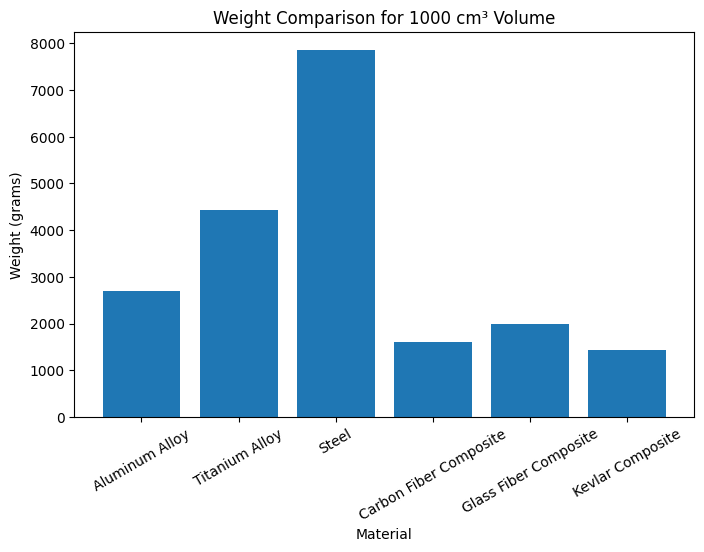

In [8]:
import matplotlib.pyplot as plt

def plot_comparison(volume):
    results = compare_materials(volume)
    materials = list(results.keys())
    weights = list(results.values())

    plt.figure(figsize=(8, 5))
    plt.bar(materials, weights)
    plt.xlabel("Material")
    plt.ylabel("Weight (grams)")
    plt.title(f"Weight Comparison for {volume} cm³ Volume")
    plt.xticks(rotation=30)
    plt.show()

plot_comparison(1000)


In [9]:
results = compare_materials(1000)
df_results = pd.DataFrame(list(results.items()), columns=["Material", "Weight (g)"])
df_results.to_csv("weight_results.csv", index=False)
df_results


,Material,Weight (g)
0,Aluminum Alloy,2700.0
1,Titanium Alloy,4430.0
2,Steel,7850.0
3,Carbon Fiber Composite,1600.0
4,Glass Fiber Composite,2000.0
5,Kevlar Composite,1440.0
